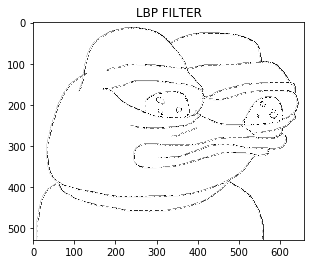

In [2]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


def pixel_affect(img, value, xpixel, ypixel):
    return int(img[xpixel][ypixel] >= value)


def compute_matrix(img, xcenter, ycenter):
    matrix = []
    center = img[xcenter][ycenter]
    matrix.append((pixel_affect(img, center, xcenter-1, ycenter-1)))
    matrix.append((pixel_affect(img, center, xcenter-1, ycenter)))
    matrix.append((pixel_affect(img, center, xcenter-1, ycenter+1)))
    matrix.append((pixel_affect(img, center, xcenter, ycenter+1)))
    matrix.append((pixel_affect(img, center, xcenter+1, ycenter+1)))
    matrix.append((pixel_affect(img, center, xcenter+1, ycenter)))
    matrix.append((pixel_affect(img, center, xcenter+1, ycenter-1)))
    matrix.append((pixel_affect(img, center, xcenter, ycenter-1)))
    return np.sum(np.multiply(matrix, [1, 2, 4, 8, 16, 32, 64, 128]))


# Load an color image in grayscale
img = cv2.imread('cc9.png', 0)


img = np.pad(img, 1, mode="edge")  # Add padding

arrayImg = np.asarray(img)  # Convert image as nparray
arrayImgResult = np.zeros(arrayImg.shape)  # convert potential matrix


for i in range(1, arrayImg.shape[0]-1):
    for j in range(1, arrayImg.shape[1]-1):
        arrayImgResult[i, j] = compute_matrix(arrayImg, i, j)


plt.title("LBP FILTER")
plt.imshow(arrayImgResult, cmap="gray")
plt.show()


In [1]:
print(3)

3
